# Importing All necessary Libraries

In [180]:
import pandas as pd
import numpy as np
from numpy import nan
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import re

# Importing Warnings

In [181]:
import warnings
warnings.filterwarnings('ignore')

# Loading the Dataset

In [182]:
data=pd.read_excel('Final_Train.xlsx')
test=pd.read_excel('Final_Test.xlsx')

# Checking the dataset

In [183]:
data.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [184]:
test.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...


In [185]:
data.describe()

,Fees
count,5961.000000
mean,307.944640
std,190.920373
min,5.000000
25%,150.000000
50%,300.000000
75%,500.000000
max,950.000000


Observations : 
    
    There are only one numeric value named Fees. here the mean is 307.944640. Maximum value is 950.000000. Mean value is greater than median. So, it's right skewed. There is a big difference in between 75% and maximum value.

# Correlation

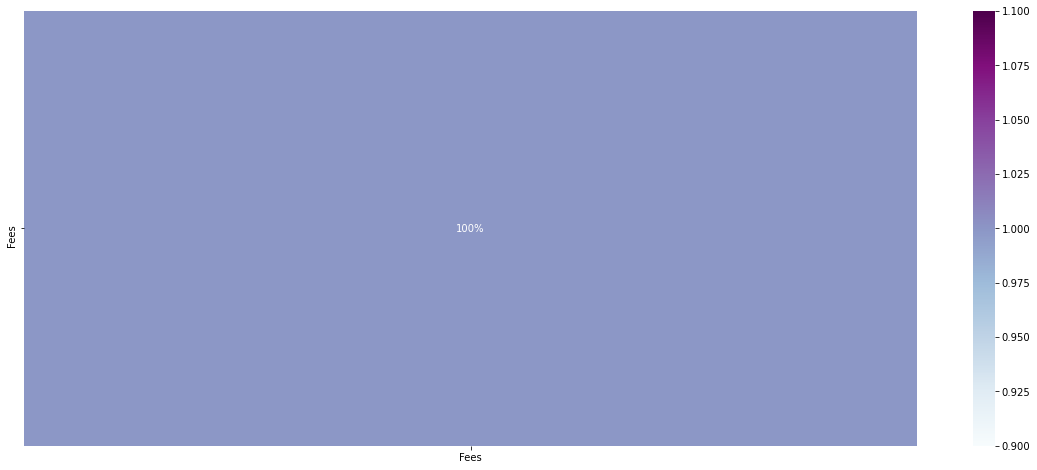

In [186]:
plt.figure(figsize=(20,8))
sns.heatmap(data.corr(),annot=True,fmt='.0%',cmap='BuPu')
plt.show()

Observations : 
    
    All the columns are object type. That's why it's not showing any correlation

# Check Null values

In [187]:
#_____________________________

          #Train

#_____________________________


data.isnull().sum()

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

In [188]:
#_____________________________

          #Test

#_____________________________



test.isnull().sum()

Qualification            0
Experience               0
Rating                1090
Place                    6
Profile                  0
Miscellaneous_Info     834
dtype: int64

# Data preprocessing

### 1. Experience

In [189]:
#Extract

#_____________________________

          #Train

#_____________________________


data["Experience"] = data["Experience"].str.split()
data["Experience"] = data["Experience"].str[0].astype("int")


#_____________________________

          #Test

#_____________________________


test["Experience"] = test["Experience"].str.split()
test["Experience"] = test["Experience"].str[0].astype("int")

### 2. Place

In [190]:
#Extract to place and cities

#_____________________________

          #Train

#_____________________________

data["Place"].fillna("Unknown,Unknown",inplace=True)
data["Place"] = data["Place"].str.split(",")
data["City"] = data["Place"].str[-1]
data["Place"] = data["Place"].str[0]



#_____________________________

          #Test

#_____________________________



test["Place"].fillna("Unknown,Unknown",inplace=True)
test["Place"] = test["Place"].str.split(",")
test["City"] = test["Place"].str[-1]
test["Place"] = test["Place"].str[0]

### 3. Ratings

In [191]:
# Seperate Ratings into bins

#_____________________________

          #Train

#_____________________________


data["Rating"].fillna("-99%",inplace=True)
data["Rating"] = data["Rating"].str[:-1].astype("int")

bins = [-99,0,10,20,30,40,50,60,70,80,90,100]
labels = [i for i in range(11)]
data["Rating"] = pd.cut(data["Rating"],bins=bins,labels=labels,include_lowest=True)


#_____________________________

          #Test

#_____________________________

test["Rating"].fillna("-99%",inplace=True)
test["Rating"] = test["Rating"].str[:-1].astype("int")

bins = [-99,0,10,20,30,40,50,60,70,80,90,100]
labels = [i for i in range(11)]
test["Rating"] = pd.cut(test["Rating"],bins=bins,labels=labels,include_lowest=True)

### 4. Qualification

In [192]:
#_____________________________

          #Train

#_____________________________


data["Qualification"]=data["Qualification"].str.split(",")
Qualification ={}
for x in data["Qualification"].values:
    for each in x:
        each = each.strip()
        if each in Qualification:
            Qualification[each]+=1
        else:
            Qualification[each]=1
            

most_qua = sorted(Qualification.items(),key=lambda x:x[1],reverse=True)[:10]
final_qua =[]
for tup in most_qua:
    final_qua.append(tup[0])
    
for title in final_qua:
    data[title]=0
    
for x,y in zip(data["Qualification"].values,np.array([idx for idx in range(len(data))])):
    for q in x:
        q = q.strip()
        if q in final_qua:
            data[q][y] = 1
            
data.drop("Qualification",axis=1,inplace=True)





In [193]:
#_____________________________

          #Test

#_____________________________

test["Qualification"]=test["Qualification"].str.split(",")
Qualification ={}
for x in test["Qualification"].values:
    for each in x:
        each = each.strip()
        if each in Qualification:
            Qualification[each]+=1
        else:
            Qualification[each]=1
            

most_qua = sorted(Qualification.items(),key=lambda x:x[1],reverse=True)[:10]
final_qua =[]
for tup in most_qua:
    final_qua.append(tup[0])
    
for title in final_qua:
    test[title]=0
    
for x,y in zip(test["Qualification"].values,np.array([idx for idx in range(len(test))])):
    for q in x:
        q = q.strip()
        if q in final_qua:
            test[q][y] = 1
            
test.drop("Qualification",axis=1,inplace=True)

### Check 'City' column

In [194]:
data["City"].value_counts()

 Bangalore             1258
 Mumbai                1219
 Delhi                 1185
 Hyderabad              951
 Chennai                855
 Coimbatore             228
 Ernakulam              153
 Thiruvananthapuram      86
Unknown                  25
e                         1
Name: City, dtype: int64

### Find the index of 'e' value

In [195]:
print(data[data['City']=='e'].index.values)

[3980]


In [196]:
data["City"][3980] = "Unknown"
data["Place"][3980] = "Unknown"

### Save the train as a new name

In [197]:
data.to_csv("df.csv",index=False)

### Get dummies

In [198]:
data = pd.get_dummies(data,columns=["City","Profile"],prefix=["City","Profile"])

### Drop 'Miscellaneous_Info' column

In [199]:
data.drop("Miscellaneous_Info",axis=1,inplace=True)

### Information

In [200]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 29 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   Experience                            5961 non-null   int32   
 1   Rating                                5961 non-null   category
 2   Place                                 5961 non-null   object  
 3   Fees                                  5961 non-null   int64   
 4   MBBS                                  5961 non-null   int64   
 5   BDS                                   5961 non-null   int64   
 6   BAMS                                  5961 non-null   int64   
 7   BHMS                                  5961 non-null   int64   
 8   MD - Dermatology                      5961 non-null   int64   
 9   MS - ENT                              5961 non-null   int64   
 10  Venereology & Leprosy                 5961 non-null   int64   
 11  MD -

### Check Null Values

In [201]:
data.isnull().sum()

Experience                              0
Rating                                  0
Place                                   0
Fees                                    0
MBBS                                    0
BDS                                     0
BAMS                                    0
BHMS                                    0
MD - Dermatology                        0
MS - ENT                                0
Venereology & Leprosy                   0
MD - General Medicine                   0
Diploma in Otorhinolaryngology (DLO)    0
MD - Homeopathy                         0
City_ Bangalore                         0
City_ Chennai                           0
City_ Coimbatore                        0
City_ Delhi                             0
City_ Ernakulam                         0
City_ Hyderabad                         0
City_ Mumbai                            0
City_ Thiruvananthapuram                0
City_Unknown                            0
Profile_Ayurveda                  

There are no null values

In [202]:
data.head()

,Experience,Rating,Place,Fees,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,...,City_ Hyderabad,City_ Mumbai,City_ Thiruvananthapuram,City_Unknown,Profile_Ayurveda,Profile_Dentist,Profile_Dermatologists,Profile_ENT Specialist,Profile_General Medicine,Profile_Homeopath
0,24,10,Kakkanad,100,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,12,10,Whitefield,350,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,9,0,Mathikere - BEL,300,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,12,0,Bannerghatta Road,250,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,20,10,Keelkattalai,250,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


# Encoding Categorical Variables

In [203]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

for column in data.columns:
    if data[column].dtype==np.number:
        continue
    data[column]=le.fit_transform(data[column]) 

In [204]:
data.head()

,Experience,Rating,Place,Fees,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,...,City_ Hyderabad,City_ Mumbai,City_ Thiruvananthapuram,City_Unknown,Profile_Ayurveda,Profile_Dentist,Profile_Dermatologists,Profile_ENT Specialist,Profile_General Medicine,Profile_Homeopath
0,23,8,296,9,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,11,8,856,22,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,8,0,452,21,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,11,0,68,17,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,19,8,335,17,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


# Checking Outliers

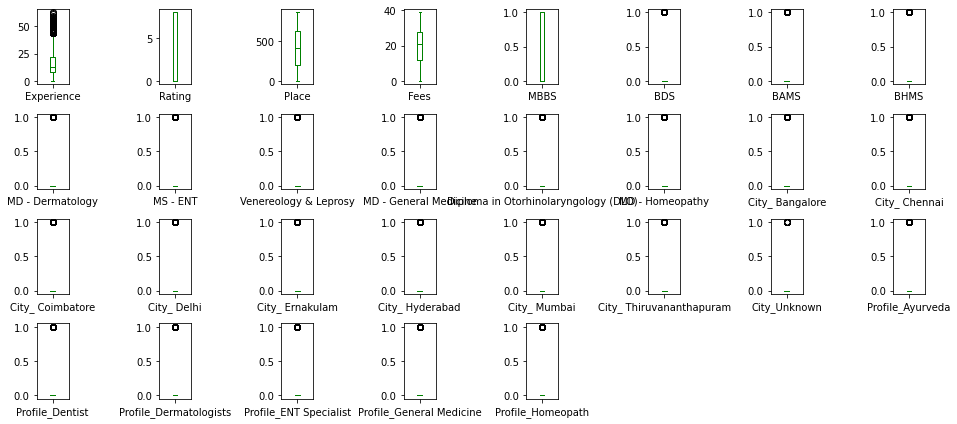

In [205]:
data.plot(kind='box',subplots=True,layout=(4,8),color='green',figsize=(13,6))
plt.tight_layout()

Observations : 
    
    Outliers are present in Experience column

# Visualization

Text(0.5, 1.0, 'Correlation with Target Variable')

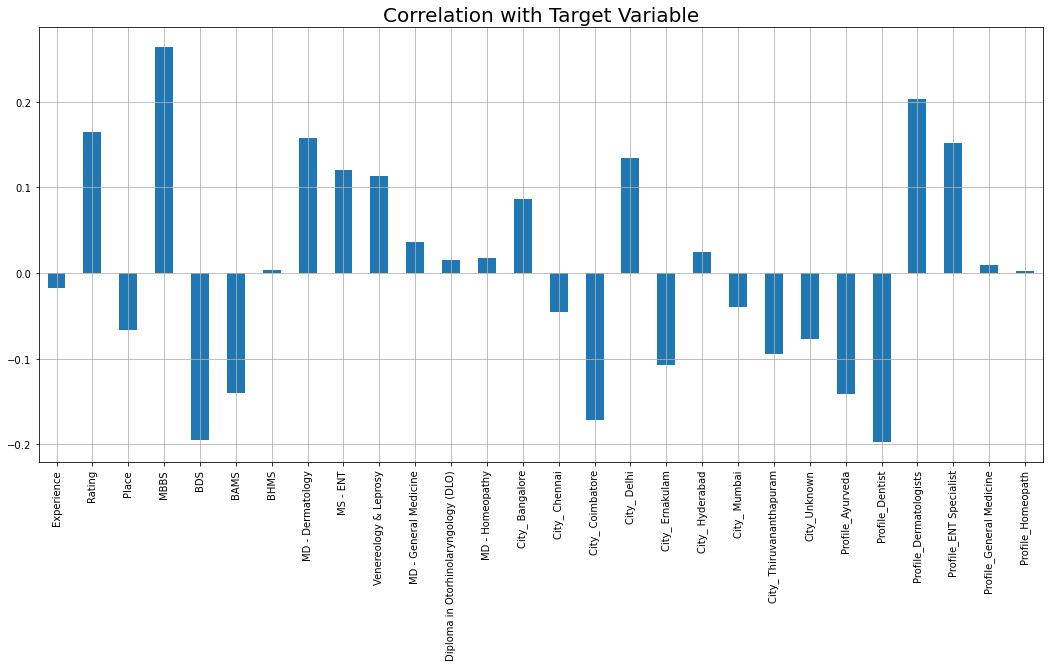

In [206]:
plt.figure(figsize=(18,8))
data.drop('Fees',axis=1).corrwith(data['Fees']).plot(kind='bar',grid=True)
plt.xticks(rotation='vertical')
plt.title("Correlation with Target Variable",fontsize=20)

Observations : 
    
    1. Good positive correlation :  'Profile_Dermatologists','Profile_ENT Specialist','MBBS','Rating','MD - Dermatology', 'MS - ENT', 'Venereology & Leprosy','City_ Bangalore','City_ Delhi'
        
    2. Good negative correlation :  'City_ Thiruvananthapuram', 'City_Unknown', 'Profile_Ayurveda', 'Profile_Dentist',  'City_ Ernakulam','City_ Coimbatore', 'BDS', 'BAMS'
    
    3. Other columns don't have good correlation

In [207]:
data.nunique()

Experience                               64
Rating                                    9
Place                                   866
Fees                                     40
MBBS                                      2
BDS                                       2
BAMS                                      2
BHMS                                      2
MD - Dermatology                          2
MS - ENT                                  2
Venereology & Leprosy                     2
MD - General Medicine                     2
Diploma in Otorhinolaryngology (DLO)      2
MD - Homeopathy                           2
City_ Bangalore                           2
City_ Chennai                             2
City_ Coimbatore                          2
City_ Delhi                               2
City_ Ernakulam                           2
City_ Hyderabad                           2
City_ Mumbai                              2
City_ Thiruvananthapuram                  2
City_Unknown                    

# VISUALISATION

# Univariate Analysis

### Experience

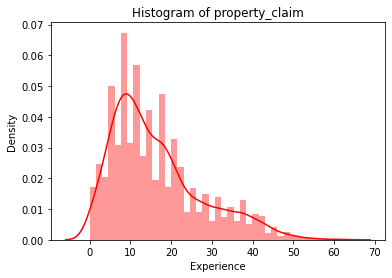

In [219]:
sns.distplot(data['Experience'],color='r')
plt.title('Histogram of property_claim')
plt.show()

### Rating

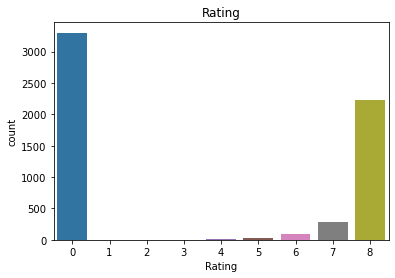

0    3302
8    2222
7     280
6      98
5      32
4      19
2       4
3       3
1       1
Name: Rating, dtype: int64


In [220]:
plt.subplots(figsize=(6,4))
sns.countplot(x="Rating",data=data)
plt.title("Rating")
plt.show()

print(data['Rating'].value_counts())

### Fees

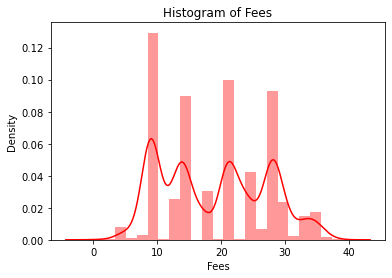

In [222]:
sns.distplot(data['Fees'],color='r')
plt.title('Histogram of Fees')
plt.show()

# Bivariate Analysis

### Experience vs Fees

<Figure size 576x288 with 0 Axes>

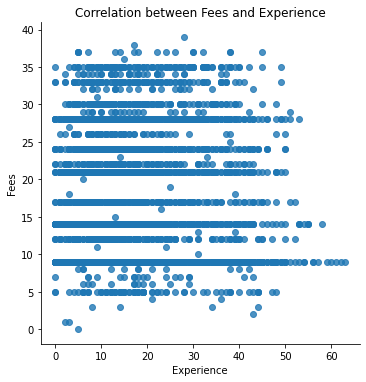

In [208]:
plt.figure(figsize=(8,4))
sns.lmplot(x='Experience',y='Fees',fit_reg=False,data=data)
plt.xlabel("Experience")
plt.title("Correlation between Fees and Experience")
plt.ylabel("Fees")
plt.show()

### Experience vs fees

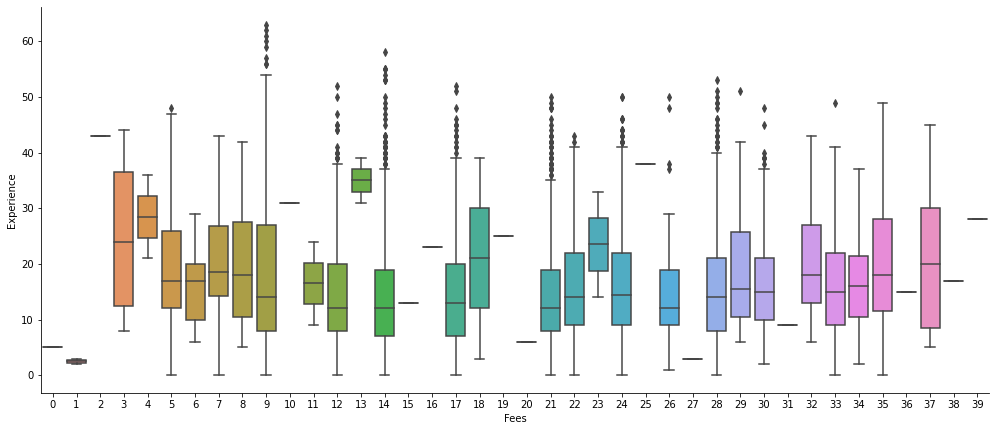

In [218]:
x=sns.catplot(x="Fees", y="Experience", kind="box", data=data)
x.fig.set_size_inches(15,6)

Observations : 
    
    It seems that there are no good correlation with experience

### Fees vs Rating

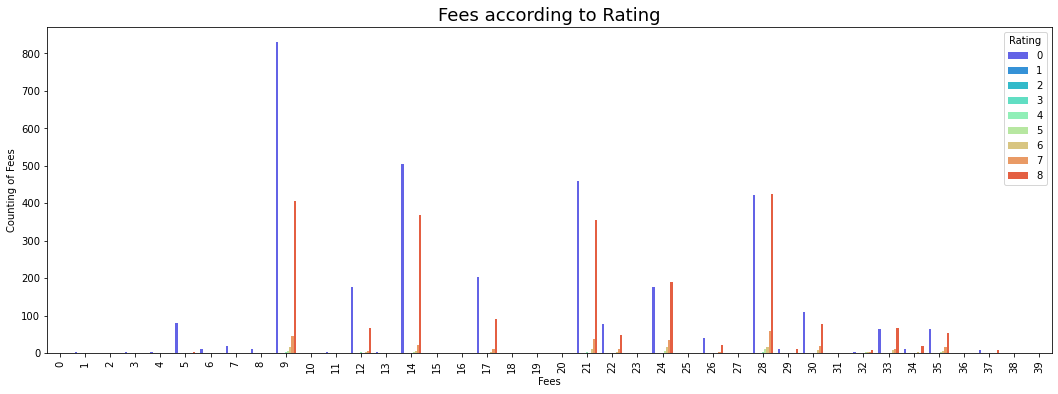

In [209]:
plt.figure(figsize=(18,6))
sns.countplot(x='Fees',hue='Rating',data=data,palette='rainbow')
plt.title("Fees according to Rating",fontsize=18)
plt.ylabel("Counting of Fees")
plt.xticks(rotation='vertical')
plt.show()


### Rating vs Fees

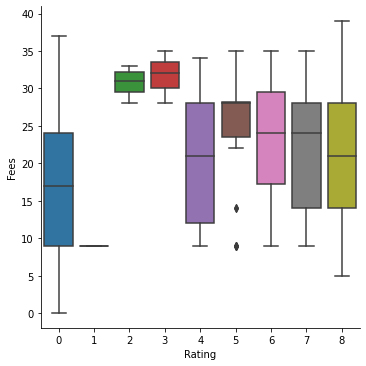

In [210]:
sns.catplot(x="Rating", y="Fees", kind="box", data=data)

# Splitting the data into input and output variable

In [23]:
x=data.drop(columns=['Fees'],axis=1)
x.head()

,Experience,Rating,Place,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,...,City_ Hyderabad,City_ Mumbai,City_ Thiruvananthapuram,City_Unknown,Profile_Ayurveda,Profile_Dentist,Profile_Dermatologists,Profile_ENT Specialist,Profile_General Medicine,Profile_Homeopath
0,23,8,296,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,11,8,856,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,8,0,452,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,11,0,68,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,19,8,335,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [24]:
y=data['Fees']
y.head()

0     9
1    22
2    21
3    17
4    17
Name: Fees, dtype: int64

# Checking the shape of the input and output variable

In [25]:
print(x.shape,'\t\t', y.shape)

(5961, 28) 		 (5961,)


# spliting the data into training and testing data

In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)

# Importing all the model Library

In [30]:
# Libraries for data modelling
from sklearn.linear_model import LogisticRegression,Ridge,Lasso,LinearRegression,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVR,SVC

#Importinf boosting models
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor,BaggingRegressor,ExtraTreesRegressor

#Importing error metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection import GridSearchCV,cross_val_score

# All algorithms by using for loop

In [57]:
model=[Lasso(),Ridge(),KNeighborsRegressor(),RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor(),BaggingRegressor(),ExtraTreesRegressor(),LinearRegression(),SVR(),ElasticNet()]


def score(y_pred,y):
    y_pred = np.log(y_pred)
    y = np.log(y)
    return 1 - ((np.sum((y_pred-y)**2))/len(y))**1/2

scorer = make_scorer(score,greater_is_better=True)
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(scaler.transform(x_test))
    pred_train=m.predict(x_train)
    pred_test=m.predict(x_test)
    print("\033[1m"+ 'Score of',m,'is : ' + "\033[0m" )  # Make the line bold
    print(score(predm,y_test))
    print("Mean Absolute Eror : ",mean_absolute_error(y_test,predm))
    print("Mean Squared Eror : ",mean_squared_error(y_test,predm))
    print("Root Mean Squared Eror : ",np.sqrt(mean_squared_error(y_test,predm)))
    print('*******************************************************************')
    print('\n')

Score of Lasso() is : 
0.895367651365323
Mean Absolute Eror :  6.686794314698256
Mean Squared Eror :  58.49606475278283
Root Mean Squared Eror :  7.648272010904347
*******************************************************************


Score of Ridge() is : 
0.9077709141523174
Mean Absolute Eror :  5.850776239469644
Mean Squared Eror :  51.20195257856498
Root Mean Squared Eror :  7.155553967273602
*******************************************************************


Score of KNeighborsRegressor() is : 
0.8993133523035683
Mean Absolute Eror :  5.99547359597653
Mean Squared Eror :  58.46119027661358
Root Mean Squared Eror :  7.64599177848195
*******************************************************************


Score of RandomForestRegressor() is : 
0.9092376506047956
Mean Absolute Eror :  5.661637671469817
Mean Squared Eror :  51.99351949411218
Root Mean Squared Eror :  7.210653194691322
*******************************************************************


Score of AdaBoostRegressor() is :

# Cross validate all algorithm by using loop

In [58]:
model=[Lasso(),Ridge(),KNeighborsRegressor(),RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor(),BaggingRegressor(),ExtraTreesRegressor(),LinearRegression(),SVR(),ElasticNet(),RandomForestRegressor()]
for m in model:
    score=cross_val_score(m,x,y,cv=10,scoring='r2')
    print("Model : ",m)
    print("Mean Score : ",score.mean())
    print("Standard deviation : ",score.std())
    print('*******************************************************************')
    print('\n')

Model :  Lasso()
Mean Score :  0.03808590735106386
Standard deviation :  0.010331640545170682
*******************************************************************


Model :  Ridge()
Mean Score :  0.18225839580725686
Standard deviation :  0.025233464172284763
*******************************************************************


Model :  KNeighborsRegressor()
Mean Score :  -0.039769982311855114
Standard deviation :  0.04804120759780891
*******************************************************************


Model :  RandomForestRegressor()
Mean Score :  0.19189088871242133
Standard deviation :  0.037871449477057985
*******************************************************************


Model :  AdaBoostRegressor()
Mean Score :  0.14863234248808826
Standard deviation :  0.016241094460004584
*******************************************************************


Model :  GradientBoostingRegressor()
Mean Score :  0.22276986172088648
Standard deviation :  0.024528082083704012
***********************

### SVR(), GradientBoostingRegressor(),giving best score and r2 score .Here,  I will choose SVR() it as my final model

### Using GridSearchCV to find the best parameter

In [59]:
parameters = {"C":[0.1,1,10],"kernel":["linear","rbf","poly"]}
svc=SVR()

clf=GridSearchCV(svc,parameters)
clf.fit(x,y)
print(clf.best_params_)

{'C': 0.1, 'kernel': 'linear'}


### Using Suport Vector Machine regressor with its best parameter

In [67]:
parameters = {"C":[0.1,1,10],"kernel":["linear","rbf","poly"]}
reg = GridSearchCV(SVR(),param_grid=parameters,scoring=scorer,n_jobs=-1,cv=5)
reg.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: RuntimeWarning: invalid value encountered in subtract
  array_stds = np.sqrt(np.average((array -


GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring=make_scorer(score))

In [68]:
reg.best_params_

{'C': 0.1, 'kernel': 'linear'}

In [71]:
def score(y_pred,y):
    y_pred = np.log(y_pred)
    y = np.log(y)
    return 1 - ((np.sum((y_pred-y)**2))/len(y))**1/2
y_pred_tuned = reg.predict(scaler.transform(x_test))
score(y_pred_tuned,y_test)

0.9036598723882636

In [74]:
def score(y_pred,y):
    y_pred = np.log(y_pred)
    y = np.log(y)
    return 1 - ((np.sum((y_pred-y)**2))/len(y))**1/2
svc=SVR(C=0.1,kernel='linear')
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
print('\n')
print(score(y_test,predsvc))





0.9496623848339139


<ipython-input-74-8fb56d3b7060>:3: RuntimeWarning: invalid value encountered in log
  y = np.log(y)


Observations : 
    
    After using hyperparameter tuning the score has been improved

# Saving the model

### Importinf joblib

In [77]:
import joblib

### Save the model as a pickle in a file

In [78]:
joblib.dump(svc,'Doctor_fee_Prediction.pkl')

['Doctor_fee_Prediction.pkl']